In [33]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [34]:
df = pd.read_csv("energydata_complete.csv")

In [35]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [36]:
df['date'] = pd.to_datetime(df.date)

df['weekday'] = df['date'].dt.strftime('%A')

df['Month'] = df['date'].dt.strftime('%m').astype('int64')

df['Week_no'] = df['date'].dt.strftime('%W').astype('int64')

df['Hour_of_the_day'] = df['date'].dt.strftime('%H').astype('int64')

df['NSM'] = df['date'].dt.strftime('%H:%M:%S')
df['NSM'] = df['NSM'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[1]) *60 + int(x[2]))

df['WeekStatus'] = (df['date'].dt.strftime('%w').astype(int) < 5).astype('int64')

df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

W_Status = pd.get_dummies(df.WeekStatus,prefix='W_Status').astype('int64')
Day_W = pd.get_dummies(df.weekday, prefix = 'Dy_w').astype('int64')

df = pd.concat([df,W_Status,Day_W],axis=1)

In [37]:
featureColumns = ['Appliances','NSM','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6',
                  'T7','RH_7','T8','RH_8','T9','RH_9','T_out','RH_out','Visibility','Windspeed','Tdewpoint',
                  'Press_mm_hg','W_Status_1','W_Status_0',
                  'Dy_w_Monday','Dy_w_Tuesday','Dy_w_Wednesday','Dy_w_Thursday',
                  'Dy_w_Friday','Dy_w_Saturday','Dy_w_Sunday']

In [38]:
df = df[featureColumns]

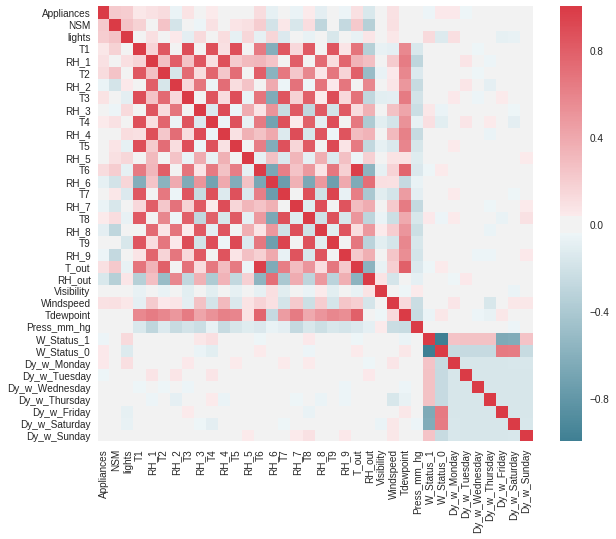

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig("correlation.png")

In [40]:
X = df.drop(['Appliances'],axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)
        
#MAE, RMS, MAPE, R2
    
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)
    
rms_train = sqrt(mean_squared_error(y_train, y_train_predicted))
rms_test = sqrt(mean_squared_error(y_test, y_test_predicted))

In [43]:
r2_train,r2_test,rms_train, rms_test

(0.36746700742114724,
 0.27829672128782712,
 82.27914632243053,
 84.67171755319775)

Text(0,0.5,'Feature Importance Score')

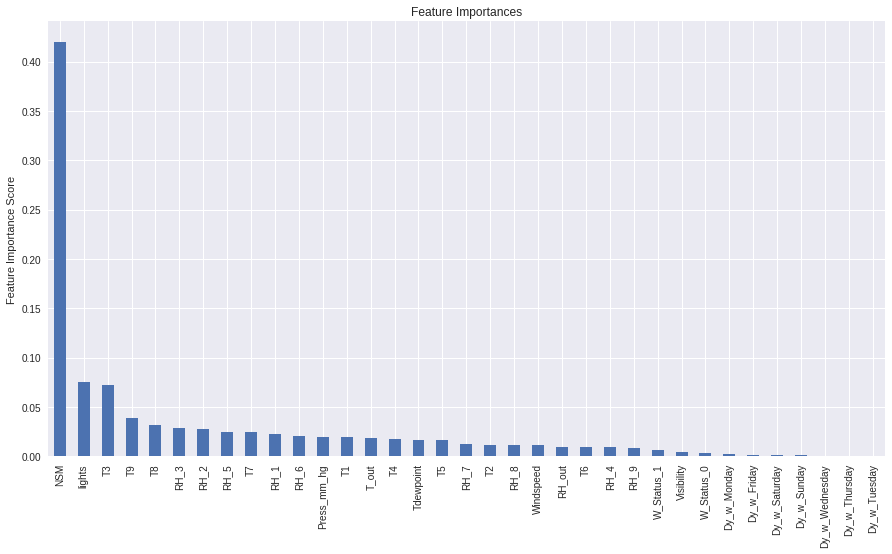

In [44]:
feat_imp = pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Feature Importance Score')